In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = sns.load_dataset("tips")

In [2]:
# Boxplot
# 막대그래프와 유사하게 수치를 길이로 표현하지만, 사분위수를 함께 시각화함.

# Boxplot의 구성 요소 01. 박스의 아래선
# 1사분위수 - Q1, 25%

# Boxplot의 구성 요소 02. 박스의 중간선
# 중앙값 - 2사분위수, Q2, 50%

# Boxplot의 구성 요소 03. 박스의 윗선
# 3사분위수 - Q3, 75%

# Boxplot의 구성 요소 04. 아래쪽 수염
# 'Q1 - 1.5 * IQR'의 값.

# Boxplot의 구성 요소 05. 위쪽 수염
# 'Q3 + 1.5 * IQR'의 값.

# Boxplot의 구성 요소 06. 점들
# 이상치 (outliers)

# Boxplot은 사분위수와 IQR(1사분위수와 3사분위수의 간격)을 기반한 이상치 확인이 가능해, 변수의 분포 치우침 여부 및 이상치의 포함 정도를 알 수 있음.

In [3]:
# Violinplot
# Boxplot의 가장 큰 값과 작은 값을 모두 하나로 연결해 하나의 도형으로 표시한 그래프.
# 모양이 가운데가 볼록하고 양 끝으로 갈수록 가늘어지는 형태인 바이올린 모양 같아 Violinplot이라고 명명됨.

# Boxplot과 Violinplot 모두 단순한 평균값으로는 알 수 없는 데이터의 숨겨진 분포 특성을 드러내는 강력한 도구.
# 데이터 분석에서 이상치 탐지, 분포 분석, 그룹 간 비교에 필수적으로 사용됨.

In [4]:
# Boxplot의 기본 문법
# 'sns.boxplot(x, y)

# parameter 01. x
# x축 변수

# parameter 02. y
# y축 변수

# parameter 03. hue
# 색상으로 grouping 할 변수.

# parameter 04. orient
# 막대의 방향
# vertical - 기본 / horizontal - 수평

# parameter 05. data
# Dataframe 또는 다차원 배열.

In [5]:
# Violinplot 기본 문법
# 'sns.violinplot(x, y)

# parameter 01. x
# x축 변수

# parameter 02. y
# y축 변수

# parameter 03. hue
# 색상으로 grouping 할 변수

# parameter 04. orient
# 막대의 방향
# vertical - 기본 / horizontal - 수평

# parameter 05. data
# Dataframe 또는 다차원 배열

<Axes: xlabel='size', ylabel='tip'>

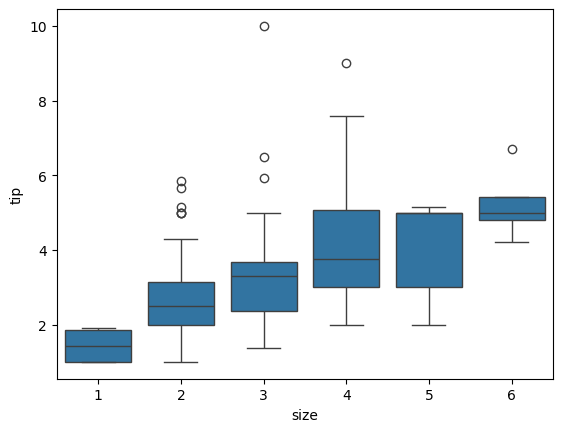

In [6]:
# 기본 Boxplot 생성하기.
# 인원수 별 팁 지불 금액 파악을 위한 boxplot 생성하기.
sns.boxplot(x=df['size'], y=df['tip'])

# 1. 2명, 3명, 4명, 6명의 y축(tip) 변수의 값들 중 이상치가 존재하는 것을 확인할 수 있음.
# 특히 3명일 때 tip 지불 금액 최댓값이 존재함.
# 4명일 땐 값의 분포가 다양함.
# 아래쪽 수염(Q1 - 1.5 * IQR)과 위쪽 수염(Q3 + 1.5 * IQR)의 간격이 넓을수록, 팁 지불 금액이 다양하다는 의미.
# 1명일 때와 6명일 때 tip 지불 금액 분포가 제일 좁음.
# 5명일 때의 tip 지불 금액의 중앙값이 왜 안 보이지?

In [7]:
# 바로 위 boxplot에서 'size = 5'일 때 median 값을 나타내는 선이 보이지 않는 이유와 해결 방법을 GPT한테 받았음.

# 이유 01. 표본의 수가 너무 적은 경우. (1개 또는 2개에서 제일 심함)
# 표본이 1개이면, 'Q1 = Q2 = Q3'이기 때문에, 박스가 한 줄로 붕괴되는 현상 발생.

# 이유 02. 중앙값이 Q1이거나 Q3와 정확히 같은 경우.
# median 선이 박스의 경계선과 완전히 겹쳐서 안 보일 수 있음.

# 실무에서 사용하는 스타일로 size별 plot을 요약해보자.
def box_stats(s: pd.Series) -> pd.Series:
    q1 = s.quantile(0.25)
    q2 = s.quantile(0.5)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    whisker_low = s[s >= lower_fence].min()
    whisker_high = s[s <= upper_fence].max()

    return pd.Series({
        "n": s.size,
        "q1": q1,
        "median": q2,
        "q3": q3,
        "lower_fence": lower_fence,
        "upper_fence": upper_fence,
        "whisker_low": whisker_low,
        "whisker_high": whisker_high,
        "q1_eq_median": np.isclose(q1, q2),
        "median_eq_q3": np.isclose(q2, q3),
        "iqe_eq_0": np.isclose(iqr, 0)
    })

stats = df.groupby("size")["tip"].apply(box_stats)

print(stats.loc[5])

# 결과를 보니, 'median(Q2) == Q3'여서 선이 보이지 않았음.
# 그러면 size = 5일 때의 median 과 Q3를 구별하려면 어떻게 해야 하나?

n                   5
q1                3.0
median            5.0
q3                5.0
lower_fence       0.0
upper_fence       8.0
whisker_low       2.0
whisker_high     5.14
q1_eq_median    False
median_eq_q3     True
iqe_eq_0        False
Name: tip, dtype: object


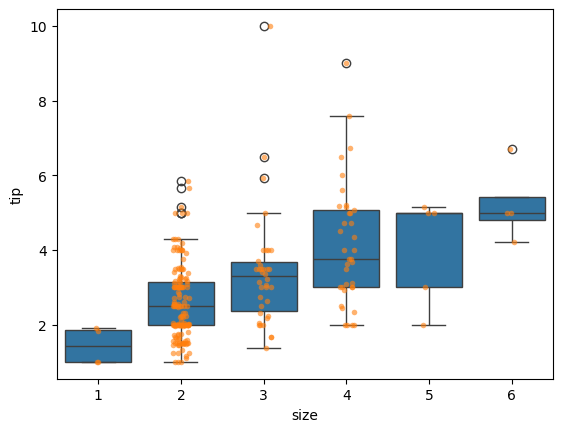

In [8]:
# 선 겹침 구별 방법 01. 원자료 점을 같이 찍기.
# stripplot, swarmplot을 가장 추천한다고 하네요..

# Boxplot은 요약 통계이기에 겹침이 발생하면 정보가 사라짐.
# 실무에선 'Boxplot + 원자료 점'을 같이 올려 실제로 값이 어떻게 몰려있는지를 보여주는 것이 제일 효과가 좋음.
ax = sns.boxplot(x=df['size'], y=df['tip'])

sns.stripplot(x=df['size'], y=df['tip'], ax=ax, jitter=True, size=4, alpha=0.6)

plt.show()

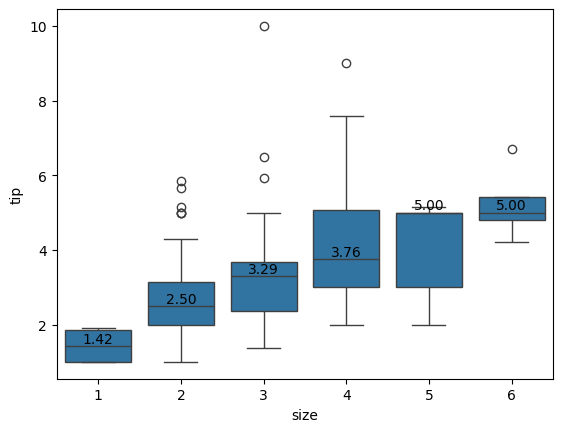

In [9]:
# 선 겹침 구별 방법 02. median 값을 text로 labeling 하기.
# 숫자로 표시하는 방식.
ax = sns.boxplot(x=df['size'], y=df['tip'])

med = df.groupby("size")["tip"].median()

for i, (grp, m) in enumerate(med.items()):
    ax.text(i, m, f"{m:.2f}", ha="center", va="bottom")

plt.show()

<Axes: xlabel='size', ylabel='tip'>

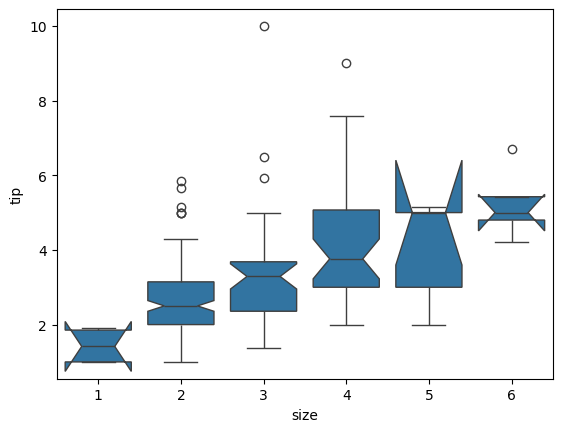

In [10]:
# 선 겹침 구별 방법 03. notch boxplot 사용하기.
# notch는 median 주변을 강조해서, median 위칠르 간접적으로 더 읽기 쉽게 만듦.
# 다만, 데이터가 적은 경우에는 해석에 주의해야 함.
sns.boxplot(x=df['size'], y=df['tip'], notch=True)

# 모양이 기괴한데..

<Axes: xlabel='size', ylabel='tip'>

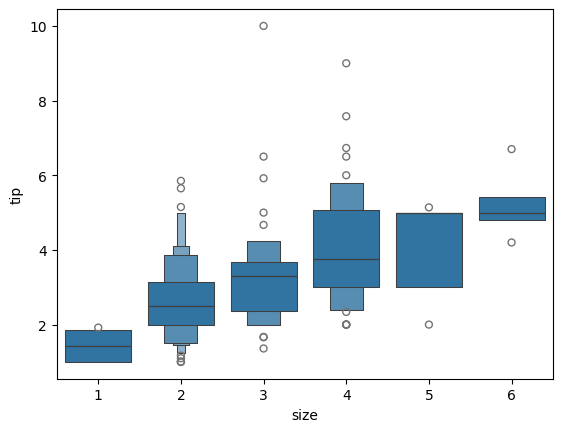

In [11]:
# 선 겹침 구별 방법 04. boxplot 대신 boxenplot 사용해보기.
# 데이터가 많거나 분포 구조를 더 세밀하게 봐야 할 때 유용.
sns.boxenplot(x=df['size'], y=df['tip'])

# tips dataset에서 boxenplot은 별로인듯..

<Axes: xlabel='size', ylabel='tip'>

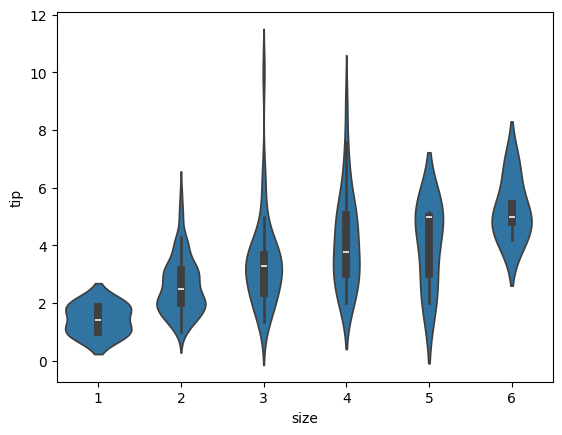

In [14]:
# violinplot 생성해보기.
sns.violinplot(x=df['size'], y=df['tip'])

# 진짜 바이올린과 비슷한 모양.
# 최솟값과 최댓값을 구분하기는 쉬움.
# 근데, 막대가 너무 작긴 하다.

In [15]:
# Boxplot
# 정확환 사분위수 값 확인 가능.
# 이상치를 명확하게 식별 가능.
# 직관적인 통계적 해석 가능.

# Violinplot
# 데이터의 밀도 분포를 시각적으로 표현함.
# 분포의 모양(치우침, 봉우리 개수)등을 명확히 확인 가능.
# 다봉분포(bimodal) 식별 가능.

In [16]:
# Boxplot 해석
# 박스의 높이 = IQR의 크기
# IQR의 크기가 클수록 분산이 크다는 의미.
# 중앙선이 박스 중앙에 있으면 대칭분포를, 치우쳐 있으면 비대칭분포를 나타냄.
# 수염의 길이가 길수록 극값이 중앙값에서 멀리 떨어져 있음.
# 이상치를 나타내는 점이 많을수록 이상치가 많음.

In [18]:
# Violinplot 해석
# 모양이 대칭이면 정규분포에 가깝고, 봉우리가 여러 개이면 다봉분포를 의미함.
# 너비가 좁은 부분은 해당 값의 빈도가 낮음을 의미.
# 전체적인 모양으로 데이터의 전반적인 분포 패턴 확인 가능.

In [19]:
# Boxplot은 정확한 사분위수 정보가 필요할 때,
# 이상치 식별이 중요한 분석에서,
# 여러 그룹 간 중앙값 비교 시,
# 통계 보고서나 학술 논문에서 선택하는 것이 적합함.

# Violinplot은 데이터의 분포 모양이 중요할 때,
# 다봉분포나 치우침 확인 시,
# 밀도 정보가 필요한 분석에서,
# 시각적 임팩트가 중요한 프레젠테이션에서 선택하는 것이 좋음.